<a href="https://colab.research.google.com/github/ashmit1028/cu/blob/main/cu_final_project_arasada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NYC Boroughs through yellow taxi data lens

# Core Investigations


*   Does Manhattan ever sleep? Let's find out.
*   Where do all the taxis go after midnight?
*   Where do New Yorkers escape to after work?
*   How far can $20 take you in each borough?
*   Which boroughs start moving first each day?

# Digging Deeper
* What Borough has the most pickups?
* What Borough has the most dropoffs?
* What pair of boroughs has the most pickups, dropoffs?
* What borough has the highest morning traffic?
* Which borough has the lowest morning traffic?



# Datasets Used
1. [NYC Taxi Trip data, 2023 january](https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet).
2. [Taxi Zone lookup](https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv).


# Project Goals
* ETL (Extract, Transform, Load) project.
* Take a publicly available data, analyze the data in a meaningful manner, and summarize your findings in some of universal format (Text File, CSV, Image).

# Project Checklist

* The code runs and there are no errors or exceptions.
* The code is commented properly (use comments to explain your steps of analysis)
* The code contains at least one conditional statement
* The code contains at least one loop
* The code contains at least one data structure (list, set, tuple, dictionary, pandas dataframe, etc) [DONE]



In [ ]:
#### setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import files

In [ ]:
# data set: nyc taxi trip data january 2023
# upload the yellow cab trip data from google drive.

#### FAULTY CODE ####
# parquet_file_path = '/content/drive/My Drive/yellow_tripdata_2023-01.parquet'

# df = pd.read_parquet(parquet_file_path)
# trip_100k_df = df.sample(n=100000, random_state=42) # Added random_state for reproducibility
# display(trip_100k_df.head())
#### END FAULTY ####

uploaded = files.upload()
df = pd.read_parquet("yellow_tripdata_2023-01.parquet")
trip_100k_df = df.sample(n=100000)
trip_100k_df.head()

Saving yellow_tripdata_2023-01.parquet to yellow_tripdata_2023-01.parquet


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
792997,2,2023-01-10 07:54:06,2023-01-10 08:11:15,5.0,1.02,1.0,N,40,33,1,14.9,0.0,0.5,3.28,0.00,1.0,19.68,0.0,0.00
767362,2,2023-01-09 19:01:44,2023-01-09 19:09:51,1.0,1.41,1.0,N,162,237,1,10.0,2.5,0.5,2.50,0.00,1.0,19.00,2.5,0.00
1393508,2,2023-01-15 20:53:58,2023-01-15 21:24:06,1.0,11.43,1.0,N,138,143,1,49.2,6.0,0.5,13.40,6.55,1.0,80.40,2.5,1.25
1579966,2,2023-01-17 22:29:53,2023-01-17 22:36:23,1.0,1.90,1.0,N,246,163,1,10.0,1.0,0.5,3.00,0.00,1.0,18.00,2.5,0.00
2079176,2,2023-01-22 17:18:19,2023-01-22 17:25:16,1.0,1.52,1.0,N,140,236,1,9.3,0.0,0.5,2.66,0.00,1.0,15.96,2.5,0.00


In [ ]:
# data set: nyc taxi trip data january 2023
# upload the yellow cab trip data from google drive.

#### FAULTY CODE ####
# csv_file_path = '/content/drive/My Drive/taxi_zone_lookup.csv'
# taxi_zone_df = pd.read_csv(csv_file_path)
# display(taxi_zone_df.head())
#### END FAULTY ####

uploaded = files.upload()
taxi_zone_df = pd.read_csv("taxi_zone_lookup.csv")
taxi_zone_df.head()

Saving taxi_zone_lookup.csv to taxi_zone_lookup.csv


,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [ ]:
# merge them to get descriptive location
joined_df = pd.merge(trip_100k_df, taxi_zone_df, left_on="PULocationID", right_on="LocationID")
joined_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,LocationID,Borough,Zone,service_zone
0,2,2023-01-10 07:54:06,2023-01-10 08:11:15,5.0,1.02,1.0,N,40,33,1,...,3.28,0.00,1.0,19.68,0.0,0.00,40,Brooklyn,Carroll Gardens,Boro Zone
1,2,2023-01-09 19:01:44,2023-01-09 19:09:51,1.0,1.41,1.0,N,162,237,1,...,2.50,0.00,1.0,19.00,2.5,0.00,162,Manhattan,Midtown East,Yellow Zone
2,2,2023-01-15 20:53:58,2023-01-15 21:24:06,1.0,11.43,1.0,N,138,143,1,...,13.40,6.55,1.0,80.40,2.5,1.25,138,Queens,LaGuardia Airport,Airports
3,2,2023-01-17 22:29:53,2023-01-17 22:36:23,1.0,1.90,1.0,N,246,163,1,...,3.00,0.00,1.0,18.00,2.5,0.00,246,Manhattan,West Chelsea/Hudson Yards,Yellow Zone
4,2,2023-01-22 17:18:19,2023-01-22 17:25:16,1.0,1.52,1.0,N,140,236,1,...,2.66,0.00,1.0,15.96,2.5,0.00,140,Manhattan,Lenox Hill East,Yellow Zone


In [ ]:
# filter out rows with "Borough" == "Unknown" - we have about 1300 of them.
joined_df = joined_df[joined_df["Borough"] != "Unknown"]
joined_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,LocationID,Borough,Zone,service_zone
0,2,2023-01-10 07:54:06,2023-01-10 08:11:15,5.0,1.02,1.0,N,40,33,1,...,3.28,0.00,1.0,19.68,0.0,0.00,40,Brooklyn,Carroll Gardens,Boro Zone
1,2,2023-01-09 19:01:44,2023-01-09 19:09:51,1.0,1.41,1.0,N,162,237,1,...,2.50,0.00,1.0,19.00,2.5,0.00,162,Manhattan,Midtown East,Yellow Zone
2,2,2023-01-15 20:53:58,2023-01-15 21:24:06,1.0,11.43,1.0,N,138,143,1,...,13.40,6.55,1.0,80.40,2.5,1.25,138,Queens,LaGuardia Airport,Airports
3,2,2023-01-17 22:29:53,2023-01-17 22:36:23,1.0,1.90,1.0,N,246,163,1,...,3.00,0.00,1.0,18.00,2.5,0.00,246,Manhattan,West Chelsea/Hudson Yards,Yellow Zone
4,2,2023-01-22 17:18:19,2023-01-22 17:25:16,1.0,1.52,1.0,N,140,236,1,...,2.66,0.00,1.0,15.96,2.5,0.00,140,Manhattan,Lenox Hill East,Yellow Zone


In [ ]:
# rename PU location details columns
joined_df = joined_df.rename(columns={'Borough': 'PUBorough', 'Zone': 'PUZone', 'service_zone': 'PUServiceZone', 'LocationID': 'PULocationID_lookup'})
joined_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PULocationID_lookup,PUBorough,PUZone,PUServiceZone
0,2,2023-01-10 07:54:06,2023-01-10 08:11:15,5.0,1.02,1.0,N,40,33,1,...,3.28,0.00,1.0,19.68,0.0,0.00,40,Brooklyn,Carroll Gardens,Boro Zone
1,2,2023-01-09 19:01:44,2023-01-09 19:09:51,1.0,1.41,1.0,N,162,237,1,...,2.50,0.00,1.0,19.00,2.5,0.00,162,Manhattan,Midtown East,Yellow Zone
2,2,2023-01-15 20:53:58,2023-01-15 21:24:06,1.0,11.43,1.0,N,138,143,1,...,13.40,6.55,1.0,80.40,2.5,1.25,138,Queens,LaGuardia Airport,Airports
3,2,2023-01-17 22:29:53,2023-01-17 22:36:23,1.0,1.90,1.0,N,246,163,1,...,3.00,0.00,1.0,18.00,2.5,0.00,246,Manhattan,West Chelsea/Hudson Yards,Yellow Zone
4,2,2023-01-22 17:18:19,2023-01-22 17:25:16,1.0,1.52,1.0,N,140,236,1,...,2.66,0.00,1.0,15.96,2.5,0.00,140,Manhattan,Lenox Hill East,Yellow Zone


In [ ]:
# join the trip_100k_data and taxi_zone_data on the DOlocationID
joined_df = pd.merge(joined_df, taxi_zone_df, left_on="DOLocationID", right_on="LocationID", suffixes=('_pickup', '_dropoff'))
joined_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,congestion_surcharge,airport_fee,PULocationID_lookup,PUBorough,PUZone,PUServiceZone,LocationID,Borough,Zone,service_zone
0,2,2023-01-10 07:54:06,2023-01-10 08:11:15,5.0,1.02,1.0,N,40,33,1,...,0.0,0.00,40,Brooklyn,Carroll Gardens,Boro Zone,33,Brooklyn,Brooklyn Heights,Boro Zone
1,2,2023-01-09 19:01:44,2023-01-09 19:09:51,1.0,1.41,1.0,N,162,237,1,...,2.5,0.00,162,Manhattan,Midtown East,Yellow Zone,237,Manhattan,Upper East Side South,Yellow Zone
2,2,2023-01-15 20:53:58,2023-01-15 21:24:06,1.0,11.43,1.0,N,138,143,1,...,2.5,1.25,138,Queens,LaGuardia Airport,Airports,143,Manhattan,Lincoln Square West,Yellow Zone
3,2,2023-01-17 22:29:53,2023-01-17 22:36:23,1.0,1.90,1.0,N,246,163,1,...,2.5,0.00,246,Manhattan,West Chelsea/Hudson Yards,Yellow Zone,163,Manhattan,Midtown North,Yellow Zone
4,2,2023-01-22 17:18:19,2023-01-22 17:25:16,1.0,1.52,1.0,N,140,236,1,...,2.5,0.00,140,Manhattan,Lenox Hill East,Yellow Zone,236,Manhattan,Upper East Side North,Yellow Zone


In [ ]:
# rename DO location details columns
joined_df = joined_df.rename(columns={'Borough': 'DOBorough', 'Zone': 'DOZone', 'service_zone': 'DOServiceZone'})
joined_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,congestion_surcharge,airport_fee,PULocationID_lookup,PUBorough,PUZone,PUServiceZone,LocationID,DOBorough,DOZone,DOServiceZone
0,2,2023-01-10 07:54:06,2023-01-10 08:11:15,5.0,1.02,1.0,N,40,33,1,...,0.0,0.00,40,Brooklyn,Carroll Gardens,Boro Zone,33,Brooklyn,Brooklyn Heights,Boro Zone
1,2,2023-01-09 19:01:44,2023-01-09 19:09:51,1.0,1.41,1.0,N,162,237,1,...,2.5,0.00,162,Manhattan,Midtown East,Yellow Zone,237,Manhattan,Upper East Side South,Yellow Zone
2,2,2023-01-15 20:53:58,2023-01-15 21:24:06,1.0,11.43,1.0,N,138,143,1,...,2.5,1.25,138,Queens,LaGuardia Airport,Airports,143,Manhattan,Lincoln Square West,Yellow Zone
3,2,2023-01-17 22:29:53,2023-01-17 22:36:23,1.0,1.90,1.0,N,246,163,1,...,2.5,0.00,246,Manhattan,West Chelsea/Hudson Yards,Yellow Zone,163,Manhattan,Midtown North,Yellow Zone
4,2,2023-01-22 17:18:19,2023-01-22 17:25:16,1.0,1.52,1.0,N,140,236,1,...,2.5,0.00,140,Manhattan,Lenox Hill East,Yellow Zone,236,Manhattan,Upper East Side North,Yellow Zone


# Let's find out if Manhattan ever sleeps..

In [ ]:
# restrict to Manhattan-only trips
manhattan_df = joined_df[(joined_df["PUBorough"] == "Manhattan") & (joined_df["DOBorough"] == "Manhattan")]
manhattan_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,congestion_surcharge,airport_fee,PULocationID_lookup,PUBorough,PUZone,PUServiceZone,LocationID,DOBorough,DOZone,DOServiceZone
1,2,2023-01-09 19:01:44,2023-01-09 19:09:51,1.0,1.41,1.0,N,162,237,1,...,2.5,0.0,162,Manhattan,Midtown East,Yellow Zone,237,Manhattan,Upper East Side South,Yellow Zone
3,2,2023-01-17 22:29:53,2023-01-17 22:36:23,1.0,1.90,1.0,N,246,163,1,...,2.5,0.0,246,Manhattan,West Chelsea/Hudson Yards,Yellow Zone,163,Manhattan,Midtown North,Yellow Zone
4,2,2023-01-22 17:18:19,2023-01-22 17:25:16,1.0,1.52,1.0,N,140,236,1,...,2.5,0.0,140,Manhattan,Lenox Hill East,Yellow Zone,236,Manhattan,Upper East Side North,Yellow Zone
5,2,2023-01-22 11:42:18,2023-01-22 11:47:43,2.0,1.21,1.0,N,141,262,1,...,2.5,0.0,141,Manhattan,Lenox Hill West,Yellow Zone,262,Manhattan,Yorkville East,Yellow Zone
6,2,2023-01-21 22:37:21,2023-01-21 22:48:41,1.0,2.44,1.0,N,186,142,1,...,2.5,0.0,186,Manhattan,Penn Station/Madison Sq West,Yellow Zone,142,Manhattan,Lincoln Square East,Yellow Zone


In [ ]:
# # let's do a scatterplot with tpep_pickup_datetime on the x-axis and trips on the y-axis
# plt.figure(figsize=(10, 6))
# plt.scatter(manhattan_df.index, manhattan_df["tpep_pickup_datetime"])

In [ ]:
# create a column "pickup_hour" which represents the pickup hour
manhattan_df["pickup_hour"] = manhattan_df["tpep_pickup_datetime"].dt.hour
manhattan_df["hour"] = manhattan_df["pickup_hour"].apply(
    lambda h: h - 20 if h >= 20 else h + 4
)

bins = list(range(0, 10))
labels = []
for i in range(9):
    start_hour = (20 + i) % 24
    end_hour = (21 + i) % 24

    if start_hour % 12 == 0:
      start_label = "12"
    else:
      start_label = str(start_hour % 12)

    if end_hour % 12 == 0:
      end_label = "12"
    else:
      end_label = str(end_hour % 12)

    if start_hour < 12 or start_hour == 24:
      start_suffix = "AM"
    else:
      start_suffix = "PM"

    if end_hour < 12 or end_hour == 24:
      end_suffix = "AM"
    else:
      end_suffix = "PM"

    label = f"{start_label}:00{start_suffix}–{end_label}:00{end_suffix}"
    labels.append(label)

hour_bin_counts = pd.cut(
    manhattan_df["hour"],
    bins=bins,
    labels=labels,
    right=False
).value_counts().sort_index()

hour_bin_counts

/tmp/ipython-input-11-1523681980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manhattan_df["pickup_hour"] = manhattan_df["tpep_pickup_datetime"].dt.hour
/tmp/ipython-input-11-1523681980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manhattan_df["hour"] = manhattan_df["pickup_hour"].apply(


,count
hour,
8:00PM–9:00PM,4461
9:00PM–10:00PM,4268
10:00PM–11:00PM,3860
11:00PM–12:00AM,2809
12:00AM–1:00AM,2135
1:00AM–2:00AM,1587
2:00AM–3:00AM,1110
3:00AM–4:00AM,713
4:00AM–5:00AM,399


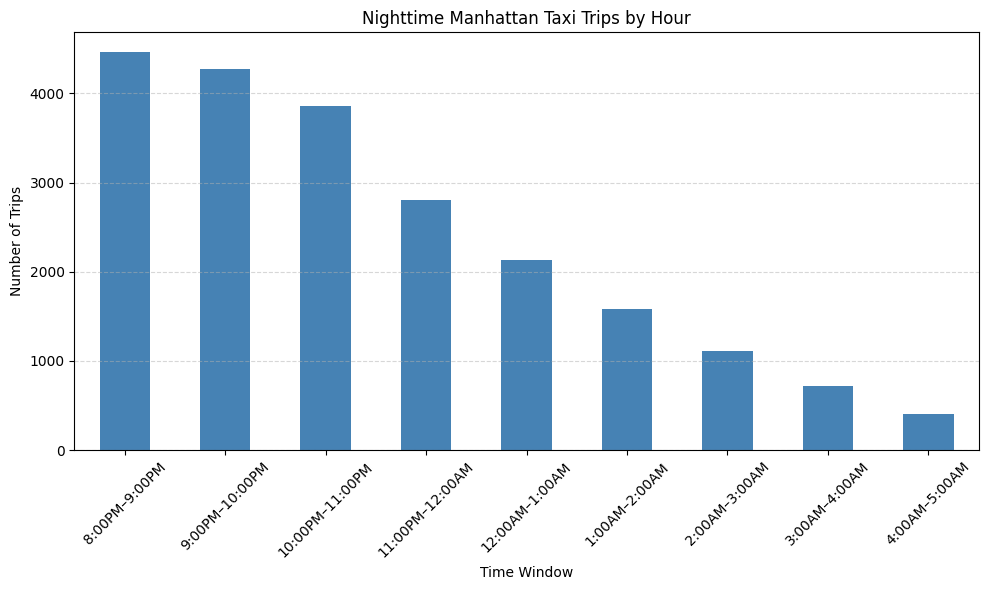

In [ ]:
# create bar plot with this info
plt.figure(figsize=(10, 6))
hour_bin_counts.plot(kind="bar", color="steelblue")
plt.title("Nighttime Manhattan Taxi Trips by Hour")
plt.xlabel("Time Window")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# While the number of trips taper off from 8 AM to 4 AM, we still see significant amount of traffic - 690 trips - even at 3-4 AM. Clearly, the city never sleeps!

# Where do people go after work? Home or hangout?


> Add blockquote



In [ ]:
# create a column "pickup_hour" which represents the pickup hour
joined_df["pickup_hour"] = joined_df["tpep_pickup_datetime"].dt.hour

# new dataframe with PULocation == "Manhattan" and pickup time between 5 and 7
after_work_manhattan_df = joined_df[(joined_df["PUBorough"] == "Manhattan") & (joined_df["pickup_hour"] >= 17) & (joined_df["pickup_hour"] <= 19)]
after_work_manhattan_df["DOBorough"].value_counts()

,count
DOBorough,
Manhattan,17429
Brooklyn,351
Queens,328
Bronx,50
EWR,29
Unknown,27


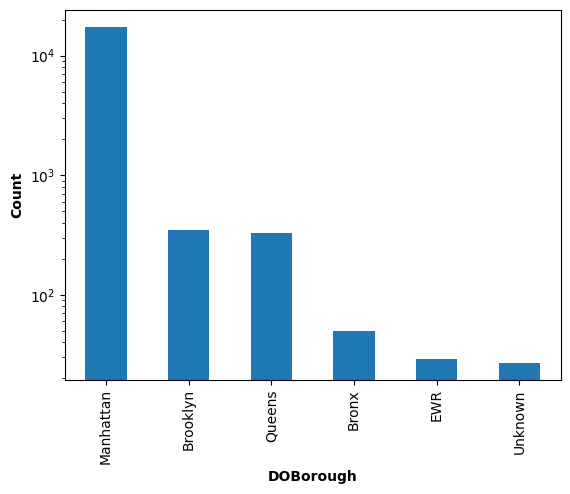

In [ ]:
# create a bar chart with counts on the log scale from after_work_manhattan_df["DOBorough"].value_counts()
after_work_manhattan_df["DOBorough"].value_counts().plot(kind="bar", logy=True)
plt.xlabel('DOBorough', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()

# Conclusion: People typically go to Manhattan, Brooklyn, and Queens. Since these boroughs have both residential and entertainment locations, it is hard to conclude much. We need to look at zones to figure this out.

# Where do all the taxis go after midnight?


In [ ]:
# filter all rows from joined_df between 12 and 5 AM and bin them by DOBorough.
midnight_df = joined_df[(joined_df['pickup_hour'] >= 0) & (joined_df['pickup_hour'] <= 4)]
midnight_df["DOBorough"].value_counts()

,count
DOBorough,
Manhattan,6196
Brooklyn,623
Queens,550
Bronx,66
Unknown,24
EWR,8
Staten Island,3


# It turns out that most people appear to be headed to Manhattan, Brooklyn or Queens.

# How far can your money take you in each borough?


In [ ]:
# how far can one get with a certain amount of money
budget = int(input("Enter your budget($): "))
current_borough = input("Enter your current borough: ").lower()
target_borough = input("Enter your target borough: ").lower()

in_budget = joined_df[joined_df["total_amount"] < budget]
trimmed_in_budget = in_budget["trip_distance"].quantile(0.9)
in_budget = in_budget[in_budget["trip_distance"] <= trimmed_in_budget]

trimmed_routes = (
    (in_budget["PUBorough"].str.lower() == current_borough) &
    (in_budget["DOBorough"].str.lower() == target_borough) &
    (in_budget["trip_distance"] > 0)
)
reachable_trips = in_budget[trimmed_routes]

if not reachable_trips.empty:
    max_distance_norm = in_budget["trip_distance"].max()
    destination_distance = reachable_trips["trip_distance"].min()
    print(f"You can reach {target_borough.title()}")
    print(f"Max possible distance within budget: {max_distance_norm:.2f} miles")
    print(f"Shortest distance from {current_borough.title()} to {target_borough.title()}: {destination_distance:.2f} miles")
else:
    print(f"Sorry, you cannot reach {target_borough.title()} within your budget.")

Enter your budget($): 20
Enter your current borough: manhattan
Enter your target borough: queens
You can reach Queens
Max possible distance within budget: 1.85 miles
Shortest distance from Manhattan to Queens: 0.80 miles


In [ ]:
# filter joined_df by trip cost < $20. Find the max distance for each burough in the remaining rows.
in_budget = joined_df[joined_df["total_amount"] < 20]
trimmed_in_budget = in_budget["trip_distance"].quantile(0.9)
in_budget = in_budget[in_budget["trip_distance"] <= trimmed_in_budget]

max_distances_by_borough = in_budget.groupby("PUBorough")["trip_distance"].max()
print(max_distances_by_borough)

PUBorough
Bronx            1.65
Brooklyn         1.80
EWR              0.00
Manhattan        1.84
Queens           1.84
Staten Island    0.82
Name: trip_distance, dtype: float64


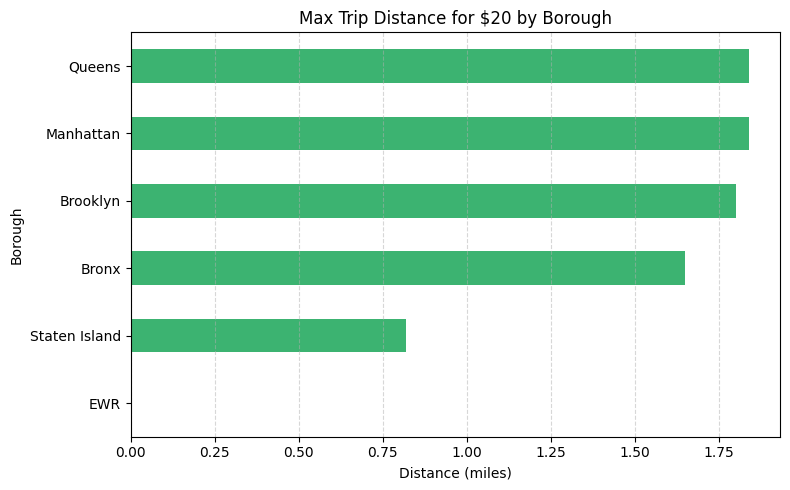

In [ ]:
max_distances_by_borough.sort_values().plot(
    kind="barh",
    color="mediumseagreen",
    figsize=(8, 5)
)

plt.title("Max Trip Distance for $20 by Borough")
plt.xlabel("Distance (miles)")
plt.ylabel("Borough")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# All boroughs except Staten Island and EWR offer taxi rides that are about 1.75+ miles for $20. Staten Island and EWR are exceptions because we do not have that much trip data.

# Which boroughs start moving first each day?

In [ ]:
# filter joined_df on PUtimes to include rows between 5-7 AM. count by borough
morning_df = joined_df[(joined_df['pickup_hour'] >= 5) & (joined_df['pickup_hour'] <= 7)]
morning_df["PUBorough"].value_counts()

,count
PUBorough,
Manhattan,4095
Queens,571
Brooklyn,73
Bronx,21
EWR,1


<Axes: xlabel='PUBorough'>

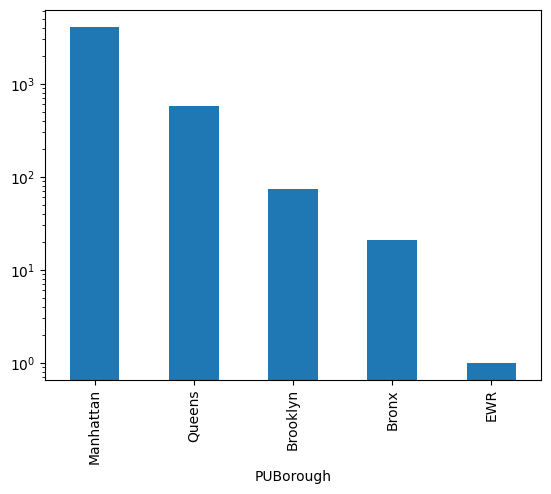

In [ ]:
# bar chart of morning_df with counts on a log scale
morning_df["PUBorough"].value_counts().plot(kind="bar", logy=True)

# Manhattan has the most pickups early in the day, meaning that it "wakes up" before the other boroughs. However, a lot of Manhattan, Queens, and Brooklyn folks are early risers.

# What Borough has the most pickups?



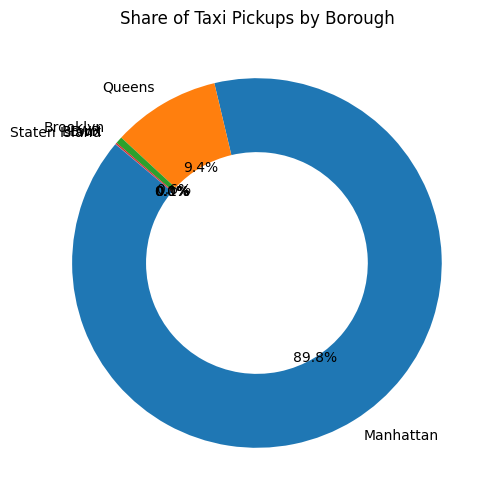

In [ ]:
# find the pickup counts for each borough
pickup_counts = joined_df["PUBorough"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(pickup_counts, labels=pickup_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'width':0.4})
plt.title("Share of Taxi Pickups by Borough")
plt.show()

# Manhattan has almost 90% of the Pickups.

> Add blockquote



# What Borough has the most dropoffs?

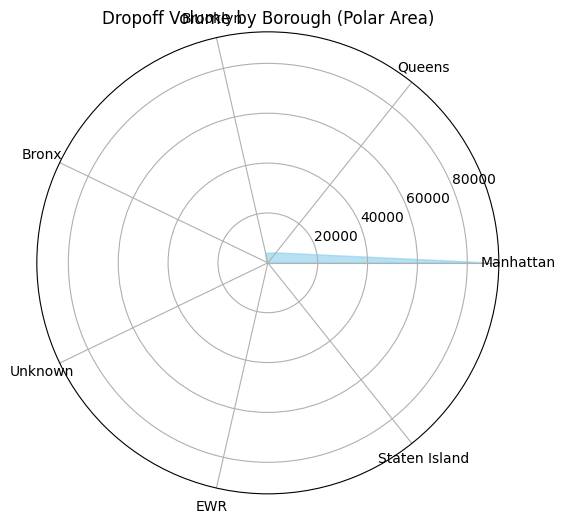

In [ ]:
# find the dropoff counts for each borough
dropoff_counts = joined_df["DOBorough"].value_counts()

angles = np.linspace(0, 2 * np.pi, len(dropoff_counts), endpoint=False).tolist()
values = dropoff_counts.values.tolist()
values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='skyblue', alpha=0.6)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(dropoff_counts.index)
ax.set_title("Dropoff Volume by Borough (Polar Area)")
plt.show()

# Unsurprisingly, Manhattan has the largest number of Dropoffs.

# What pairwise combination of boroughs has the most pickups and dropoffs?

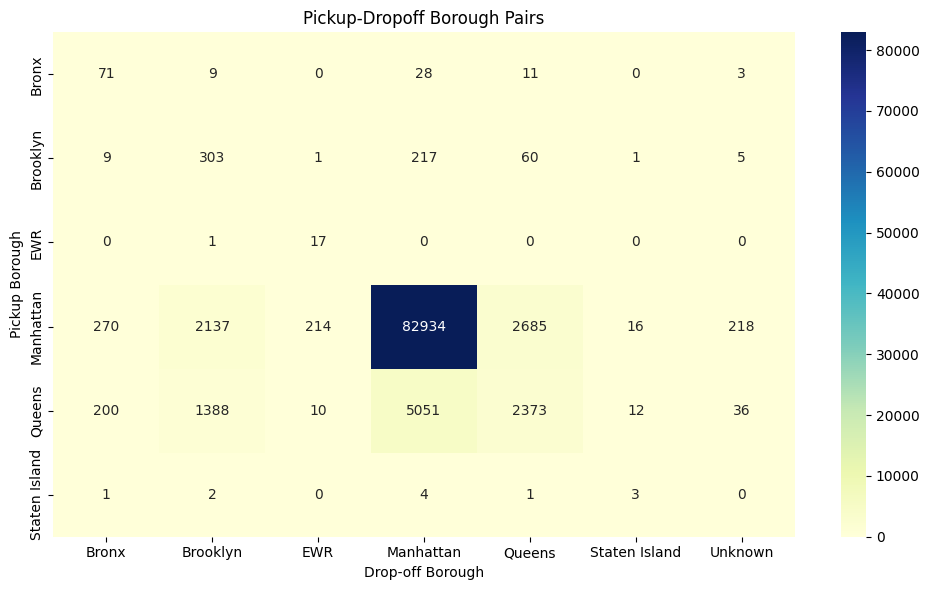

In [ ]:
# find the pair of boroughs with the most PU and DO
pair_counts = joined_df.groupby(["PUBorough", "DOBorough"]).size().unstack().fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(pair_counts, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Pickup-Dropoff Borough Pairs")
plt.xlabel("Drop-off Borough")
plt.ylabel("Pickup Borough")
plt.tight_layout()
plt.show()

# You guessed it - trips that start and end in Manhattan are the most frequent. Let's take a look at trips between the other boroughs in more detail.

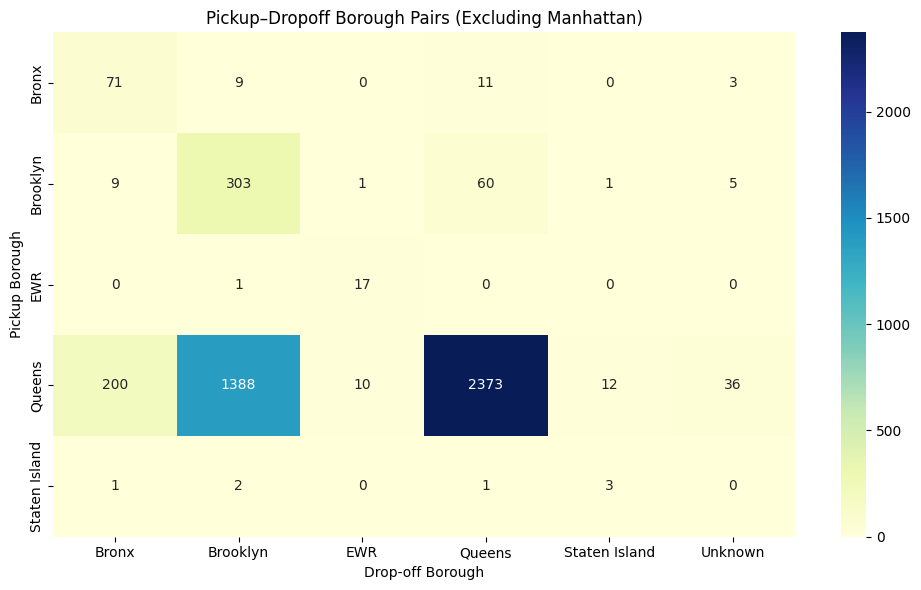

In [ ]:
filtered_df = joined_df[
    (joined_df["PUBorough"] != "Manhattan") & (joined_df["DOBorough"] != "Manhattan")
]

pair_counts = (
    filtered_df.groupby(["PUBorough", "DOBorough"])
    .size()
    .unstack()
    .fillna(0)
)

plt.figure(figsize=(10, 6))
sns.heatmap(pair_counts, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Pickup–Dropoff Borough Pairs (Excluding Manhattan)")
plt.xlabel("Drop-off Borough")
plt.ylabel("Pickup Borough")
plt.tight_layout()
plt.show()

# Trips that start and end in Queens are the most frequent, but there are other contenders like trips that start in Queens and end in Brooklyn.

# What borough has the highest morning traffic?


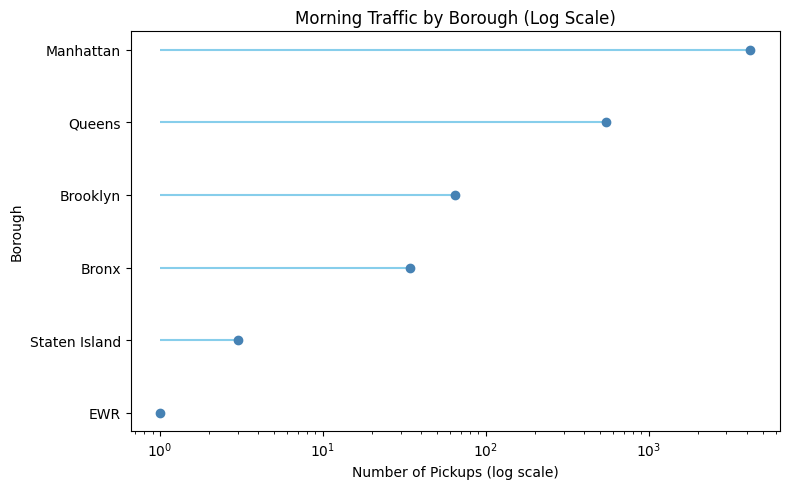

In [ ]:
# find counts of morning_df
morning_counts = morning_df["PUBorough"].value_counts().sort_values()

plt.figure(figsize=(8, 5))
plt.hlines(y=morning_counts.index, xmin=1, xmax=morning_counts.values, color='skyblue')
plt.plot(morning_counts.values, morning_counts.index, "o", color='steelblue')
plt.xscale('log')
plt.title("Morning Traffic by Borough (Log Scale)")
plt.xlabel("Number of Pickups (log scale)")
plt.ylabel("Borough")
plt.tight_layout()
plt.show()


# Manhattan appears to have the most traffic in the mornings, followed by Queens and Brooklyn.

# Which borough has the lowest morning traffic?


In [ ]:
# see above cell

# Further Analysis

<Axes: xlabel='PUBorough'>

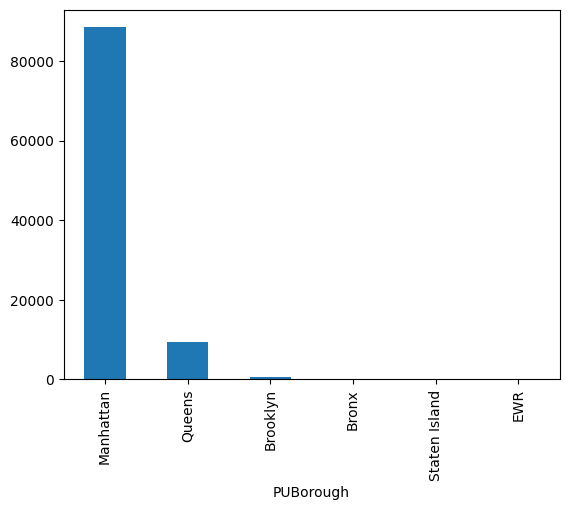

In [ ]:
# bar plot for PUBorough trip counts - non log scale
# this data seems to be very skewed, since most trips are in manhattan.
joined_df["PUBorough"].value_counts().plot(kind="bar")

<Axes: xlabel='PUBorough'>

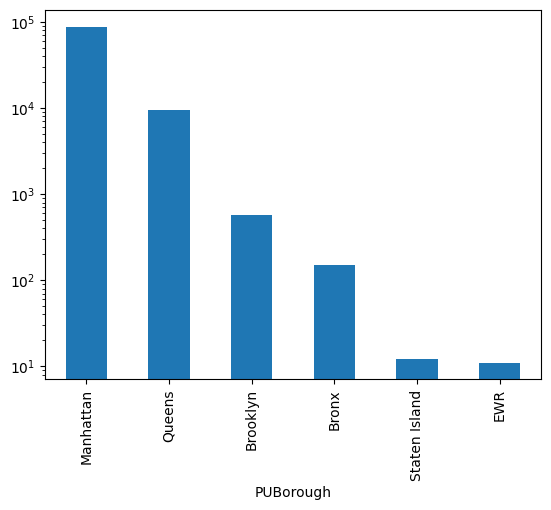

In [ ]:
# bar plot for PUBorough trip counts, use log scale for counts
joined_df["PUBorough"].value_counts().plot(kind="bar", logy=True)

In [ ]:
# calculate trip_duration
joined_df["trip_duration"] = joined_df["tpep_dropoff_datetime"] - joined_df["tpep_pickup_datetime"]
joined_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,airport_fee,PULocationID_lookup,PUBorough,PUZone,PUServiceZone,LocationID,DOBorough,DOZone,DOServiceZone,trip_duration
0,2,2023-01-13 01:55:23,2023-01-13 02:14:59,2.0,5.02,1.0,N,113,151,1,...,0.0,113,Manhattan,Greenwich Village North,Yellow Zone,151,Manhattan,Manhattan Valley,Yellow Zone,0 days 00:19:36
1,1,2023-01-17 08:14:13,2023-01-17 08:22:30,1.0,1.00,1.0,N,107,113,1,...,0.0,107,Manhattan,Gramercy,Yellow Zone,113,Manhattan,Greenwich Village North,Yellow Zone,0 days 00:08:17
2,2,2023-01-25 08:46:39,2023-01-25 09:13:28,NaN,3.94,NaN,None,234,140,0,...,NaN,234,Manhattan,Union Sq,Yellow Zone,140,Manhattan,Lenox Hill East,Yellow Zone,0 days 00:26:49
3,2,2023-01-31 13:47:54,2023-01-31 14:06:06,1.0,3.10,1.0,N,142,68,1,...,0.0,142,Manhattan,Lincoln Square East,Yellow Zone,68,Manhattan,East Chelsea,Yellow Zone,0 days 00:18:12
4,2,2023-01-22 13:45:16,2023-01-22 13:59:18,1.0,2.15,1.0,N,140,230,2,...,0.0,140,Manhattan,Lenox Hill East,Yellow Zone,230,Manhattan,Times Sq/Theatre District,Yellow Zone,0 days 00:14:02


In [ ]:
# find the trips between manhattan and queens
manhattan_queens_df = joined_df[(joined_df["PUBorough"] == "Manhattan") & (joined_df["DOBorough"] == "Queens")]
manhattan_queens_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,airport_fee,PULocationID_lookup,PUBorough,PUZone,PUServiceZone,LocationID,DOBorough,DOZone,DOServiceZone,trip_duration
41,2,2023-01-30 11:44:50,2023-01-30 12:26:10,2.0,18.84,2.0,N,141,132,1,...,0.0,141,Manhattan,Lenox Hill West,Yellow Zone,132,Queens,JFK Airport,Airports,0 days 00:41:20
116,1,2023-01-25 09:08:35,2023-01-25 09:39:37,1.0,9.00,1.0,N,100,70,1,...,0.0,100,Manhattan,Garment District,Yellow Zone,70,Queens,East Elmhurst,Boro Zone,0 days 00:31:02
150,2,2023-01-15 03:06:07,2023-01-15 03:25:41,1.0,5.87,1.0,N,113,226,1,...,0.0,113,Manhattan,Greenwich Village North,Yellow Zone,226,Queens,Sunnyside,Boro Zone,0 days 00:19:34
176,2,2023-01-11 17:51:03,2023-01-11 18:18:38,1.0,5.14,1.0,N,229,129,2,...,0.0,229,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,129,Queens,Jackson Heights,Boro Zone,0 days 00:27:35
225,2,2023-01-02 16:50:54,2023-01-02 17:41:56,1.0,16.87,2.0,N,230,132,1,...,0.0,230,Manhattan,Times Sq/Theatre District,Yellow Zone,132,Queens,JFK Airport,Airports,0 days 00:51:02


In [ ]:
# add a pickup_hour column and dropoff_hour column
joined_df["pickup_hour"] = joined_df["tpep_pickup_datetime"].dt.hour
joined_df["dropoff_hour"] = joined_df["tpep_dropoff_datetime"].dt.hour
joined_df.head()

# Time windows are defined as 5 buckets ["Past Midnight (12-5AM)", "Morning (5-10AM)", "Noon(10AM-3AM)", "Evening(3-8PM)", "Night(8PM-12AM)"]
joined_df["time_window"] = pd.cut(joined_df["pickup_hour"], bins=[0, 5, 10, 15, 20, 24], labels=["Past Midnight (12AM-5AM)", "Morning (5AM-10AM)", "Noon (10AM-3AM)", "Evening (3PM-8PM)", "Night (8PM-12AM)"])
joined_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,PUZone,PUServiceZone,LocationID,DOBorough,DOZone,DOServiceZone,trip_duration,pickup_hour,dropoff_hour,time_window
0,2,2023-01-13 01:55:23,2023-01-13 02:14:59,2.0,5.02,1.0,N,113,151,1,...,Greenwich Village North,Yellow Zone,151,Manhattan,Manhattan Valley,Yellow Zone,0 days 00:19:36,1,2,Past Midnight (12AM-5AM)
1,1,2023-01-17 08:14:13,2023-01-17 08:22:30,1.0,1.00,1.0,N,107,113,1,...,Gramercy,Yellow Zone,113,Manhattan,Greenwich Village North,Yellow Zone,0 days 00:08:17,8,8,Morning (5AM-10AM)
2,2,2023-01-25 08:46:39,2023-01-25 09:13:28,NaN,3.94,NaN,None,234,140,0,...,Union Sq,Yellow Zone,140,Manhattan,Lenox Hill East,Yellow Zone,0 days 00:26:49,8,9,Morning (5AM-10AM)
3,2,2023-01-31 13:47:54,2023-01-31 14:06:06,1.0,3.10,1.0,N,142,68,1,...,Lincoln Square East,Yellow Zone,68,Manhattan,East Chelsea,Yellow Zone,0 days 00:18:12,13,14,Noon (10AM-3AM)
4,2,2023-01-22 13:45:16,2023-01-22 13:59:18,1.0,2.15,1.0,N,140,230,2,...,Lenox Hill East,Yellow Zone,230,Manhattan,Times Sq/Theatre District,Yellow Zone,0 days 00:14:02,13,13,Noon (10AM-3AM)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98695,2,2023-01-11 11:28:48,2023-01-11 11:52:52,1.0,2.74,1.0,N,186,144,1,...,Penn Station/Madison Sq West,Yellow Zone,144,Manhattan,Little Italy/NoLiTa,Yellow Zone,0 days 00:24:04,11,11,Noon (10AM-3AM)
98696,2,2023-01-26 13:43:33,2023-01-26 13:50:10,1.0,0.00,1.0,N,162,161,1,...,Midtown East,Yellow Zone,161,Manhattan,Midtown Center,Yellow Zone,0 days 00:06:37,13,13,Noon (10AM-3AM)
98697,1,2023-01-21 13:40:49,2023-01-21 13:46:05,1.0,0.60,1.0,N,140,262,1,...,Lenox Hill East,Yellow Zone,262,Manhattan,Yorkville East,Yellow Zone,0 days 00:05:16,13,13,Noon (10AM-3AM)
98698,2,2023-01-06 19:08:38,2023-01-06 19:15:15,1.0,1.09,1.0,N,125,113,1,...,Hudson Sq,Yellow Zone,113,Manhattan,Greenwich Village North,Yellow Zone,0 days 00:06:37,19,19,Evening (3PM-8PM)


(np.float64(-1.099999281100196),
 np.float64(1.099999965766676),
 np.float64(-1.0999970253555809),
 np.float64(1.099999853636509))

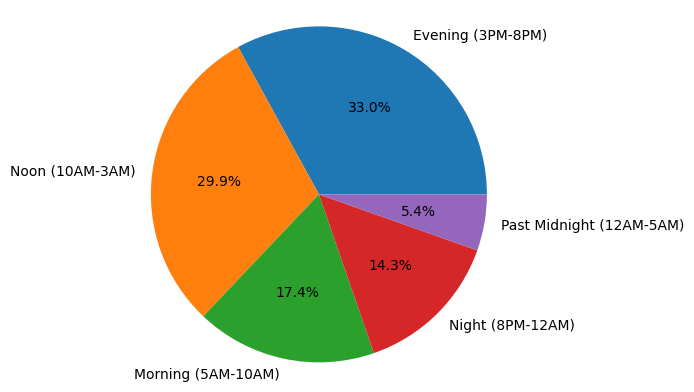

In [ ]:
# draw a pie chart of the pickup_hour distribution
PU_time_window_counts = joined_df["time_window"].value_counts()
labels = PU_time_window_counts.index
sizes = PU_time_window_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')

# Borough by Borough Analysis (Pickup Time and Trip Distance)

In [ ]:
# repeat this analysis for Manhattan only trips
manhattan_df = joined_df[(joined_df["PUBorough"] == "Manhattan") & (joined_df["DOBorough"] == "Manhattan")]
manhattan_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,PUZone,PUServiceZone,LocationID,DOBorough,DOZone,DOServiceZone,trip_duration,pickup_hour,dropoff_hour,time_window
0,2,2023-01-07 19:12:37,2023-01-07 19:24:01,2.0,2.49,1.0,N,141,79,1,...,Lenox Hill West,Yellow Zone,79,Manhattan,East Village,Yellow Zone,0 days 00:11:24,19,19,Evening (3PM-8PM)
1,2,2023-01-15 17:37:04,2023-01-15 17:56:25,1.0,3.60,1.0,N,164,13,1,...,Midtown South,Yellow Zone,13,Manhattan,Battery Park City,Yellow Zone,0 days 00:19:21,17,17,Evening (3PM-8PM)
2,2,2023-01-20 23:11:01,2023-01-20 23:27:40,3.0,2.66,1.0,N,249,162,1,...,West Village,Yellow Zone,162,Manhattan,Midtown East,Yellow Zone,0 days 00:16:39,23,23,Night (8PM-12AM)
4,1,2023-01-08 00:31:20,2023-01-08 00:55:59,1.0,5.50,1.0,N,114,263,1,...,Greenwich Village South,Yellow Zone,263,Manhattan,Yorkville West,Yellow Zone,0 days 00:24:39,0,0,NaN
5,1,2023-01-24 09:04:37,2023-01-24 09:13:51,1.0,1.00,1.0,N,68,234,1,...,East Chelsea,Yellow Zone,234,Manhattan,Union Sq,Yellow Zone,0 days 00:09:14,9,9,Morning (5AM-10AM)


(np.float64(-1.0999996955694358),
 np.float64(1.0999999855033065),
 np.float64(-1.0999981231916032),
 np.float64(1.0999999104274998))

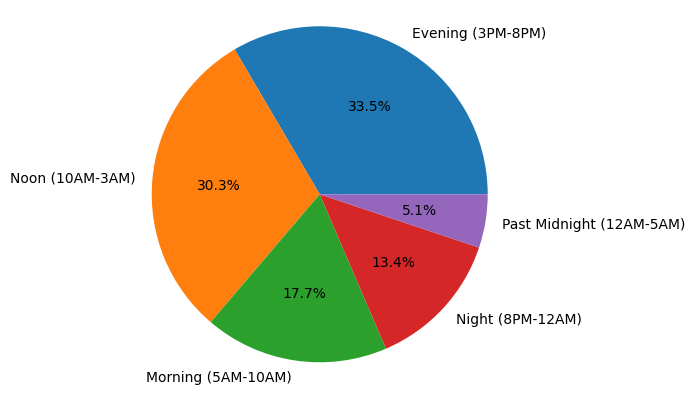

In [ ]:
# draw pie chart with percentages to represent time_window
PU_time_window_counts = manhattan_df["time_window"].value_counts()
labels = PU_time_window_counts.index
sizes = PU_time_window_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')

In [ ]:
# add a column to the trip_100k_df dataset that indicates if a trip is within the same borough
joined_df["same_borough"] = joined_df["PUBorough"] == joined_df["DOBorough"]

# filter to retain same borough trips only in joined_df
same_borough_trips_df = joined_df[joined_df["same_borough"] == True]

same_borough_trips_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,PUServiceZone,LocationID,DOBorough,DOZone,DOServiceZone,trip_duration,pickup_hour,dropoff_hour,time_window,same_borough
0,2,2023-01-07 19:12:37,2023-01-07 19:24:01,2.0,2.49,1.0,N,141,79,1,...,Yellow Zone,79,Manhattan,East Village,Yellow Zone,0 days 00:11:24,19,19,Evening (3PM-8PM),True
1,2,2023-01-15 17:37:04,2023-01-15 17:56:25,1.0,3.60,1.0,N,164,13,1,...,Yellow Zone,13,Manhattan,Battery Park City,Yellow Zone,0 days 00:19:21,17,17,Evening (3PM-8PM),True
2,2,2023-01-20 23:11:01,2023-01-20 23:27:40,3.0,2.66,1.0,N,249,162,1,...,Yellow Zone,162,Manhattan,Midtown East,Yellow Zone,0 days 00:16:39,23,23,Night (8PM-12AM),True
4,1,2023-01-08 00:31:20,2023-01-08 00:55:59,1.0,5.50,1.0,N,114,263,1,...,Yellow Zone,263,Manhattan,Yorkville West,Yellow Zone,0 days 00:24:39,0,0,NaN,True
5,1,2023-01-24 09:04:37,2023-01-24 09:13:51,1.0,1.00,1.0,N,68,234,1,...,Yellow Zone,234,Manhattan,Union Sq,Yellow Zone,0 days 00:09:14,9,9,Morning (5AM-10AM),True


In [ ]:
# # draw box plots showing distribution of trip_distance for each borough
# import seaborn as sns

# plt.figure(figsize=(8, 5))
# sns.boxplot(x='PUBorough', y='trip_distance', data=same_borough_trips_df)

<Axes: xlabel='PUBorough', ylabel='trip_distance'>

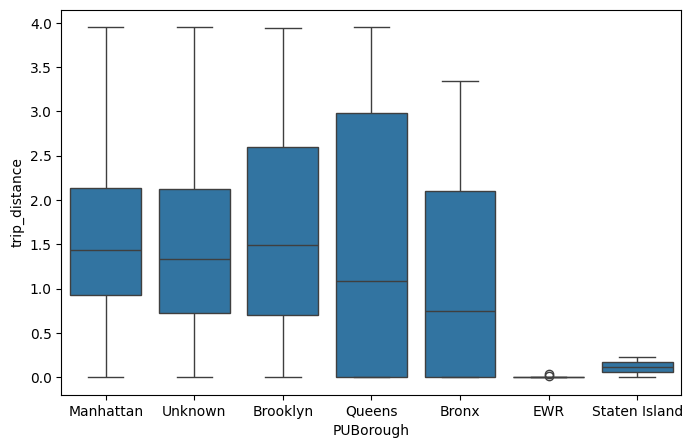

In [ ]:
# get rid of the outliers by finding an upper bound (90th %tile)

ninety_tile = same_borough_trips_df["trip_distance"].quantile(0.9)
same_borough_trips_df_norm = same_borough_trips_df[same_borough_trips_df["trip_distance"] < ninety_tile]

# same_borough_trips_df_norm["trip_distance"].describe()

plt.figure(figsize=(8, 5))
sns.boxplot(x='PUBorough', y='trip_distance', data=same_borough_trips_df_norm)

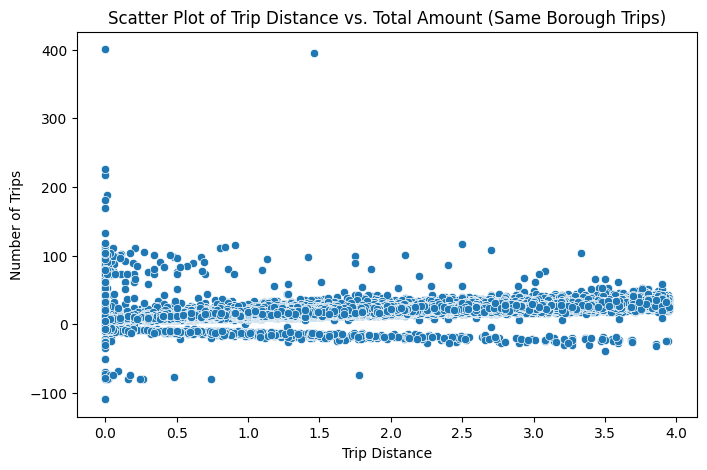

In [ ]:
# create scatter plot of same_borough_trips_df_norm using seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x='trip_distance', y='total_amount', data=same_borough_trips_df_norm)

plt.title('Scatter Plot of Trip Distance vs. Total Amount (Same Borough Trips)')
plt.xlabel('Trip Distance')
plt.ylabel('Number of Trips')

plt.show()

In [ ]:
# # add a histogram based on trip_distance values in manhattan_df
# plt.figure(figsize=(8, 5))
# sns.histplot(manhattan_df['trip_distance'], bins=6, kde=True, color='skyblue')

# # Add labels
# plt.title('Histogram of Taxi Trip Distances')
# plt.xlabel('Trip Distance (miles)')
# plt.ylabel('Frequency')

# plt.show()

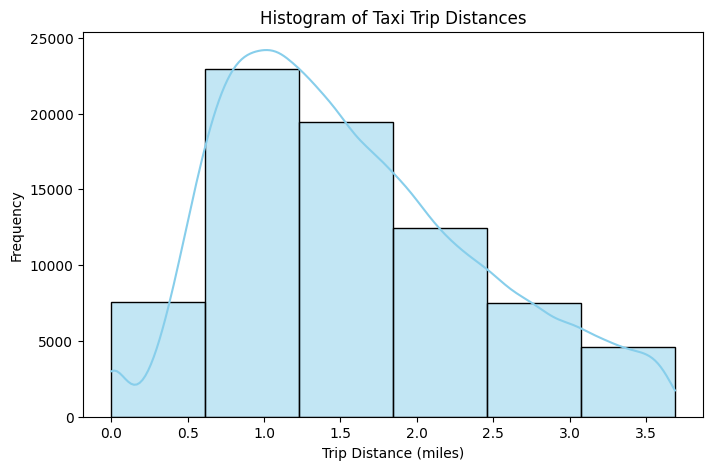

In [ ]:
# get rid of the outliers in manhattan_df by finding upper bound (90th %tile)

ninety_tile = manhattan_df["trip_distance"].quantile(0.9)
manhattan_df_norm = manhattan_df[manhattan_df["trip_distance"] < ninety_tile]

# manhattan_df_norm["trip_distance"].describe()

plt.figure(figsize=(8, 5))
sns.histplot(manhattan_df_norm['trip_distance'], bins=6, kde=True, color='skyblue')

plt.title('Histogram of Taxi Trip Distances')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')

plt.show()

(np.float64(-1.099999985984419),
 np.float64(1.0999999993325913),
 np.float64(-1.0999983325865377),
 np.float64(1.0999990787119764))

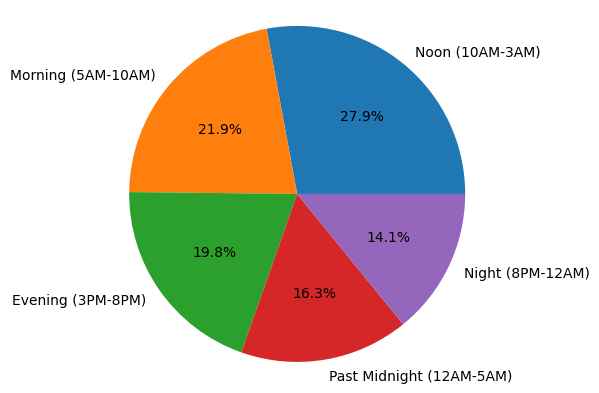

In [ ]:
# repeat this analysis for Brooklyn only trips
brooklyn_df = joined_df[(joined_df["PUBorough"] == "Brooklyn") & (joined_df["DOBorough"] == "Brooklyn")]
brooklyn_df.head()

# draw pie chart with percentages to represent time_window
PU_time_window_counts = brooklyn_df["time_window"].value_counts()
labels = PU_time_window_counts.index
sizes = PU_time_window_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')

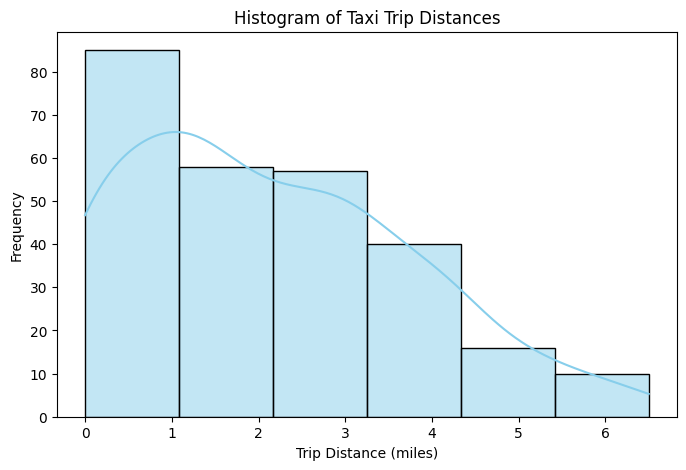

In [ ]:
# get rid of the outliers in brooklyn_df by finding upper bound (90th %tile)

ninety_tile = brooklyn_df["trip_distance"].quantile(0.9)
brooklyn_df_norm = brooklyn_df[brooklyn_df["trip_distance"] < ninety_tile]

# brooklyn_df_norm["trip_distance"].describe()

# histogram of distances for brooklyn only trips
plt.figure(figsize=(8, 5))
sns.histplot(brooklyn_df_norm['trip_distance'], bins=6, kde=True, color='skyblue')

# Add labels
plt.title('Histogram of Taxi Trip Distances')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')

plt.show()

(np.float64(-1.099999982230819),
 np.float64(1.0999999991538485),
 np.float64(-1.0999993078134875),
 np.float64(1.099999260023628))

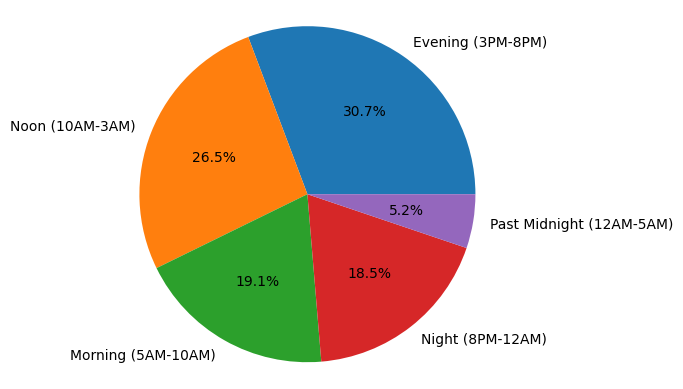

In [ ]:
# repeat this analysis for Queens only trips
queens_df = joined_df[(joined_df["PUBorough"] == "Queens") & (joined_df["DOBorough"] == "Queens")]
queens_df.head()

# draw pie chart with percentages to represent time_window
PU_time_window_counts = queens_df["time_window"].value_counts()
labels = PU_time_window_counts.index
sizes = PU_time_window_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')

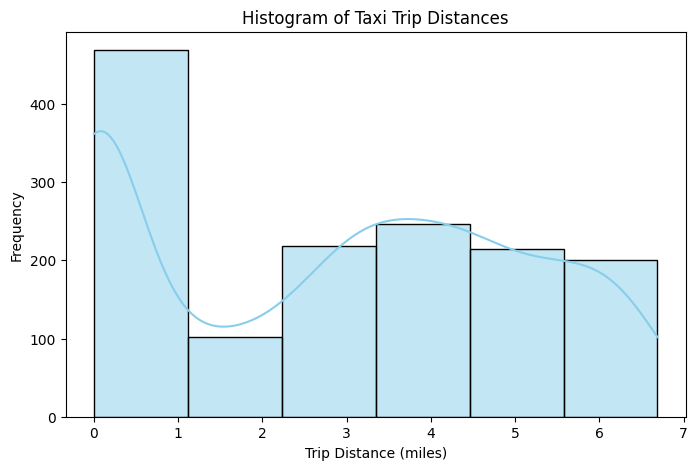

In [ ]:
# get rid of the outliers in queens_df by finding upper bound (90th %tile)

ninety_tile = brooklyn_df["trip_distance"].quantile(0.9)
queens_df_norm = queens_df[queens_df["trip_distance"] < ninety_tile]

# queens_df_norm["trip_distance"].describe()

# histogram of distances for brooklyn only trips
plt.figure(figsize=(8, 5))
sns.histplot(queens_df_norm['trip_distance'], bins=6, kde=True, color='skyblue')

# Add labels
plt.title('Histogram of Taxi Trip Distances')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')

plt.show()

(np.float64(-1.0999989175319789),
 np.float64(1.0999999484539038),
 np.float64(-1.0999985869641624),
 np.float64(1.0999987086007994))

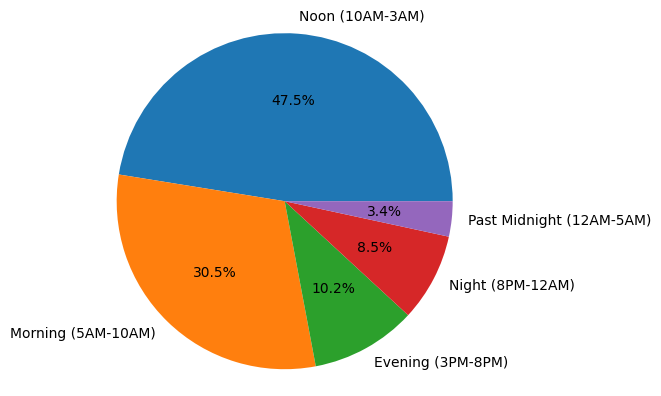

In [ ]:
# repeat this analysis for Bronx only trips
bronx_df = joined_df[(joined_df["PUBorough"] == "Bronx") & (joined_df["DOBorough"] == "Bronx")]
bronx_df.head()

# draw pie chart with percentages to represent time_window
PU_time_window_counts = bronx_df["time_window"].value_counts()
labels = PU_time_window_counts.index
sizes = PU_time_window_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')

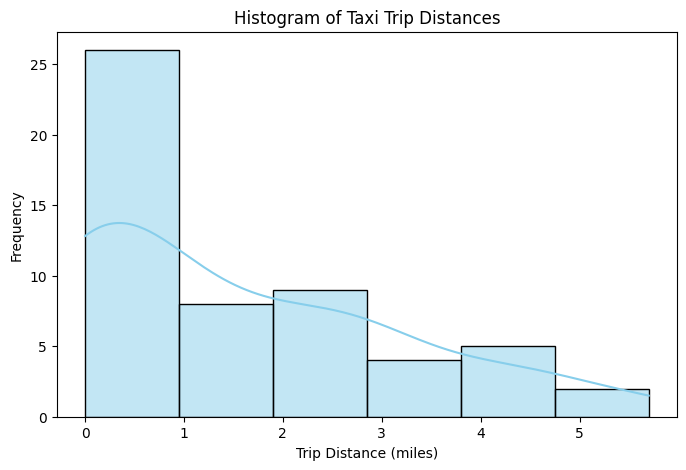

In [ ]:
# get rid of the outliers in bronx_df by finding upper bound (90th %tile)

ninety_tile = bronx_df["trip_distance"].quantile(0.9)
bronx_df_norm = bronx_df[bronx_df["trip_distance"] < ninety_tile]

# bronx_df_norm["trip_distance"].describe()

# histogram of distances for brooklyn only trips
plt.figure(figsize=(8, 5))
sns.histplot(bronx_df_norm['trip_distance'], bins=6, kde=True, color='skyblue')

# Add labels
plt.title('Histogram of Taxi Trip Distances')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')

plt.show()

(np.float64(-1.1), np.float64(1.1), np.float64(-1.1), np.float64(1.1))

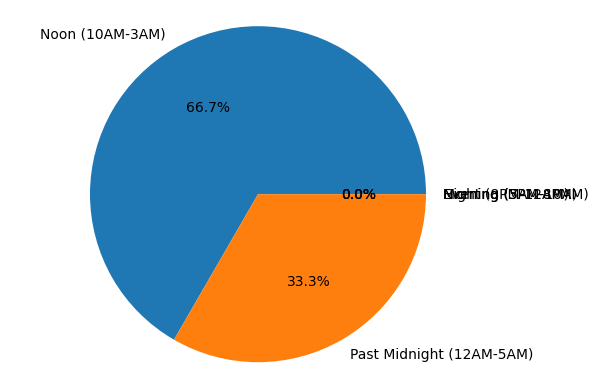

In [ ]:
# repeat this analysis for Staten Island only trips
staten_island_df = joined_df[(joined_df["PUBorough"] == "Staten Island") & (joined_df["DOBorough"] == "Staten Island")]
staten_island_df.head()

# draw pie chart with percentages to represent time_window
PU_time_window_counts = staten_island_df["time_window"].value_counts()
labels = PU_time_window_counts.index
sizes = PU_time_window_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')

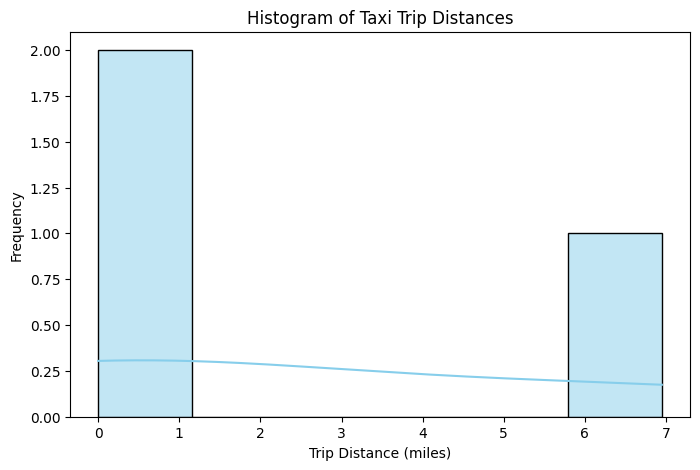

In [ ]:
# will not remove outliers as there are too few entries in staten_island_df

# histogram of distances for staten island only trips
plt.figure(figsize=(8, 5))
sns.histplot(staten_island_df['trip_distance'], bins=6, kde=True, color='skyblue')

# Add labels
plt.title('Histogram of Taxi Trip Distances')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')

plt.show()

# Pairs of Boroughs Analysis

/tmp/ipython-input-69-2405954493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manhattan_queens_df["tpep_pickup_datetime"] = pd.to_datetime(manhattan_queens_df["tpep_pickup_datetime"])


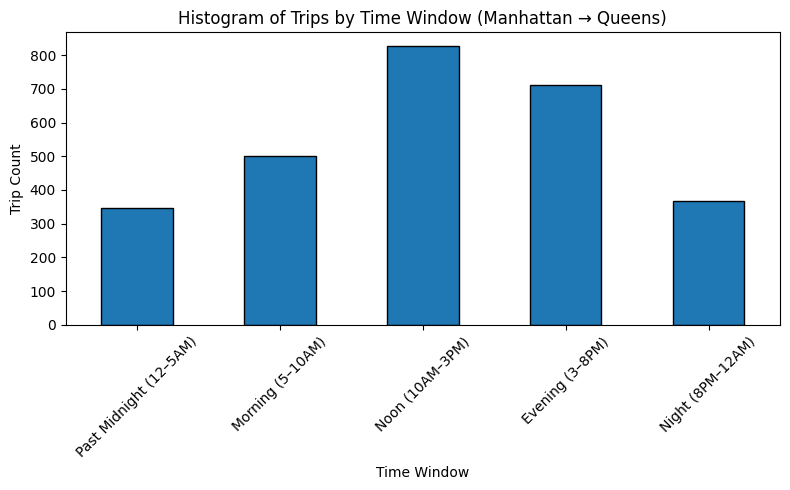

In [ ]:
# create a histogram of trip count in each time window for the manhattan_queens_df.
manhattan_queens_df["tpep_pickup_datetime"] = pd.to_datetime(manhattan_queens_df["tpep_pickup_datetime"])
pickup_hours = manhattan_queens_df["tpep_pickup_datetime"].dt.hour

bins = [0, 5, 10, 15, 20, 24]
labels = [
    "Past Midnight (12–5AM)",
    "Morning (5–10AM)",
    "Noon (10AM–3PM)",
    "Evening (3–8PM)",
    "Night (8PM–12AM)"
]

pickup_bins = pd.cut(pickup_hours, bins=bins, right=False, labels=labels)

pickup_bins.value_counts().loc[labels].plot(kind="bar", edgecolor="black", figsize=(8, 5))

plt.title("Histogram of Trips by Time Window (Manhattan → Queens)")
plt.xlabel("Time Window")
plt.ylabel("Trip Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# create unique_pairs_value_counts_df

unique_pairs_value_counts = joined_df[['PUBorough', 'DOBorough']].value_counts().reset_index(name='count')
unique_pairs_value_counts

,PUBorough,DOBorough,count
0,Manhattan,Manhattan,82826
1,Queens,Manhattan,5137
2,Manhattan,Queens,2750
3,Queens,Queens,2355
4,Manhattan,Brooklyn,2110
5,Queens,Brooklyn,1401
6,Unknown,Manhattan,618
7,Unknown,Unknown,519
8,Manhattan,Bronx,305
9,Brooklyn,Brooklyn,297


In [ ]:
# look at trips in the morning
morning_df = joined_df[joined_df["time_window"] == "Morning (5AM-10AM)"]
#morning_df.head()

morning_pair_counts_df = morning_df[['PUBorough', 'DOBorough']].value_counts().reset_index(name='count')
#morning_pair_counts_df

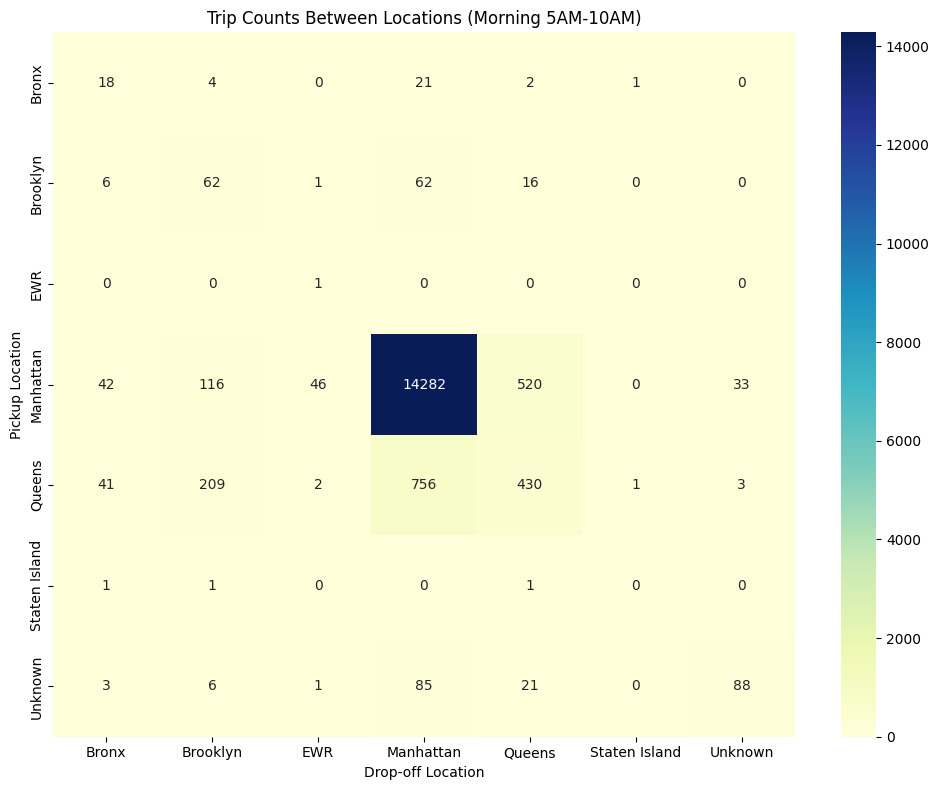

In [ ]:
# create heatmap that shows trips between PUBorough and DOBorough in the morning
pivot_table = morning_pair_counts_df.pivot_table(index="PUBorough", columns="DOBorough", values="count", fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")

plt.title("Trip Counts Between Locations (Morning 5AM-10AM)")
plt.xlabel("Drop-off Location")
plt.ylabel("Pickup Location")
plt.tight_layout()
plt.show()

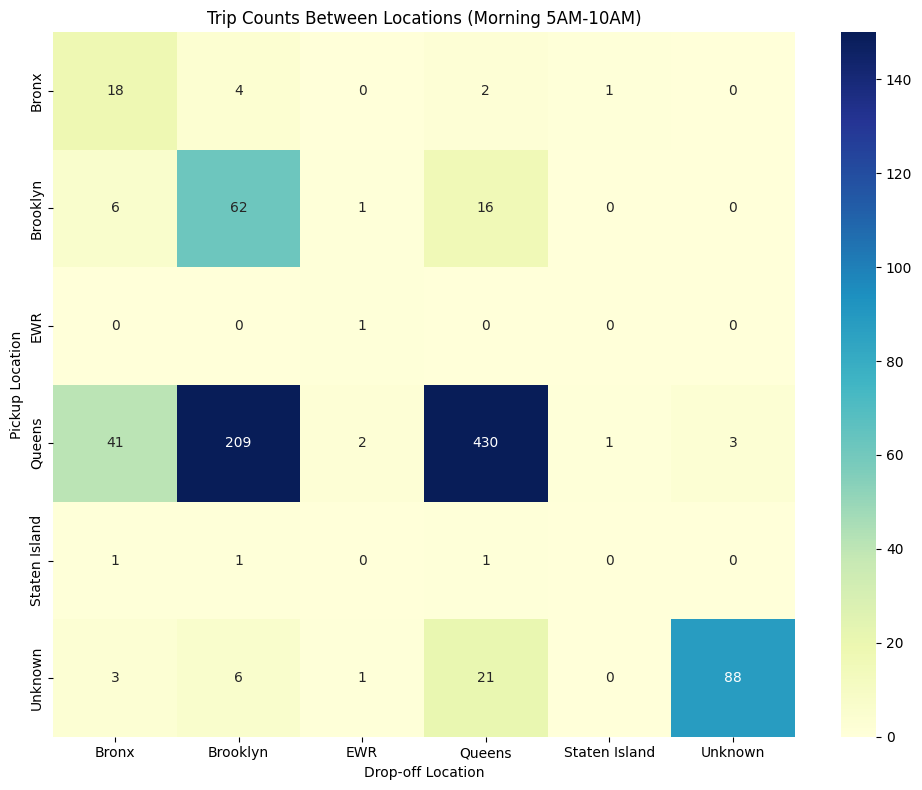

In [ ]:
# filter out Manhattan-only trips since it has a high count
morning_pair_counts_no_manhattan_df = \
    morning_pair_counts_df[ \
    (morning_pair_counts_df["PUBorough"] != "Manhattan") & \
    (morning_pair_counts_df["DOBorough"] != "Manhattan") \
    ]
# morning_pair_counts_no_manhattan_df

# create heatmap that shows trips between PUBorough and DOBorough without Manhattan-only trips
pivot_table = morning_pair_counts_no_manhattan_df.pivot_table(
    index="PUBorough",
    columns="DOBorough",
    values="count",
    fill_value=0
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    vmin=0,
    vmax=150  # adjust this threshold based on how much contrast you want
)

plt.title("Trip Counts Between Locations (Morning 5AM-10AM)")
plt.xlabel("Drop-off Location")
plt.ylabel("Pickup Location")
plt.tight_layout()
plt.show()


In [ ]:
# repeat the same analysis for evening
evening_df = joined_df[joined_df["time_window"] == "Evening (3PM-8PM)"]
# evening_df.head()

# unique_pairs_value_counts for evening
evening_pair_counts_df = evening_df[['PUBorough', 'DOBorough']].value_counts().reset_index(name='count')
# evening_pair_counts_df

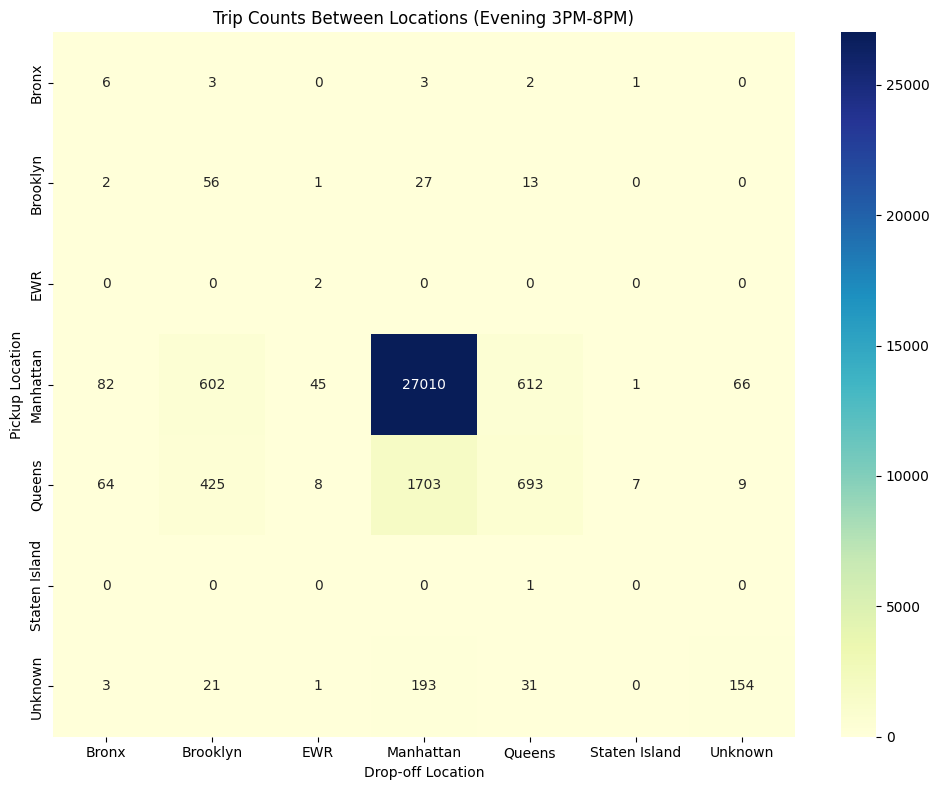

In [ ]:
# create heatmap for evening including Manhattan
pivot_table = evening_pair_counts_df.pivot_table(index="PUBorough", columns="DOBorough", values="count", fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")

plt.title("Trip Counts Between Locations (Evening 3PM-8PM)")
plt.xlabel("Drop-off Location")
plt.ylabel("Pickup Location")
plt.tight_layout()
plt.show()

In [ ]:
# create heatmap for evening without Manhattan
evening_pair_counts_no_manhattan_df = \
    evening_pair_counts_df[ \
    (evening_pair_counts_df["PUBorough"] != "Manhattan") & \
    (evening_pair_counts_df["DOBorough"] != "Manhattan") \
    ]
evening_pair_counts_no_manhattan_df

,PUBorough,DOBorough,count
2,Queens,Queens,693
5,Queens,Brooklyn,425
7,Unknown,Unknown,154
10,Queens,Bronx,64
11,Brooklyn,Brooklyn,56
13,Unknown,Queens,31
15,Unknown,Brooklyn,21
16,Brooklyn,Queens,13
17,Queens,Unknown,9
18,Queens,EWR,8


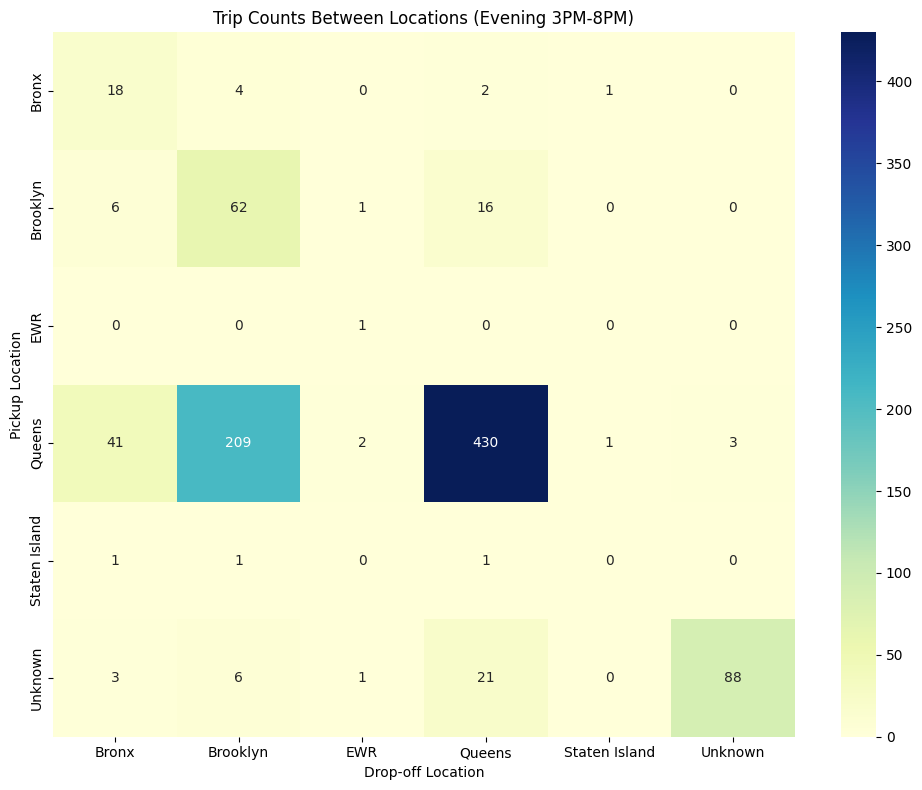

In [ ]:
# create heatmap that shows evening trips between PUBorough and DOBorough without Manhattan-only trips
pivot_table = morning_pair_counts_no_manhattan_df.pivot_table(index="PUBorough", columns="DOBorough", values="count", fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")

plt.title("Trip Counts Between Locations (Evening 3PM-8PM)")
plt.xlabel("Drop-off Location")
plt.ylabel("Pickup Location")
plt.tight_layout()
plt.show()

In [ ]:
# add column called PU-DO-Borough for easy access
unique_pairs_value_counts['PU-DO-Borough'] = unique_pairs_value_counts['PUBorough'] + '-' + unique_pairs_value_counts['DOBorough']
unique_pairs_value_counts

,PUBorough,DOBorough,count,PU-DO-Borough
0,Manhattan,Manhattan,82826,Manhattan-Manhattan
1,Queens,Manhattan,5137,Queens-Manhattan
2,Manhattan,Queens,2750,Manhattan-Queens
3,Queens,Queens,2355,Queens-Queens
4,Manhattan,Brooklyn,2110,Manhattan-Brooklyn
5,Queens,Brooklyn,1401,Queens-Brooklyn
6,Unknown,Manhattan,618,Unknown-Manhattan
7,Unknown,Unknown,519,Unknown-Unknown
8,Manhattan,Bronx,305,Manhattan-Bronx
9,Brooklyn,Brooklyn,297,Brooklyn-Brooklyn


<Axes: xlabel='PU-DO-Borough'>

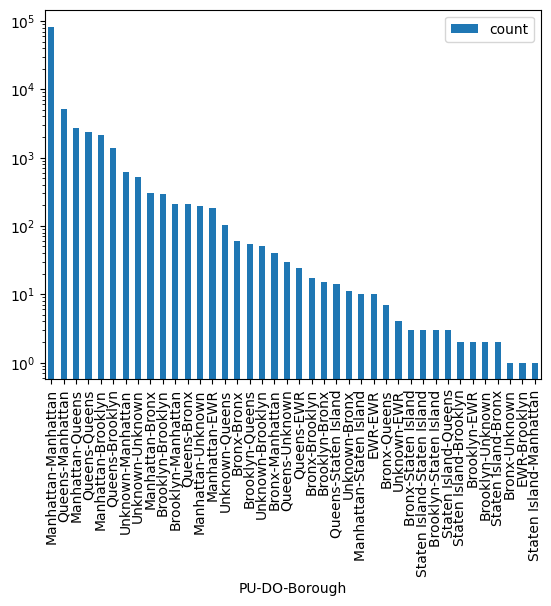

In [ ]:
# create bar plot with counts on a log scale to show unique_pairs_value_counts_df with pairs on x-axis and counts on y-axis
unique_pairs_value_counts.plot(kind='bar', x='PU-DO-Borough', y='count', logy=True)

# More exploratory questions

* What Borough has the most pickups?
* What Borough has the most dropoffs?
* What pair of boroughs has the most pickups, dropoffs?
* What borough has the highest morning traffic?
* Which borough has the lowest morning traffic?

In [ ]:
# most PU
print(joined_df["PUBorough"].value_counts())
print()

# most DO
print(joined_df["DOBorough"].value_counts())
print()

# find the pair of boroughs with the most PU and DO
print(joined_df[["PUBorough", "DOBorough"]].value_counts())
print()

# what borough has the highest morning traffic
print(morning_df["PUBorough"].value_counts())
print()

# what borough has the lowest morning traffic
print(morning_df["DOBorough"].value_counts())

PUBorough
Manhattan        88471
Queens            9407
Unknown           1321
Brooklyn           584
Bronx              131
EWR                 11
Staten Island       11
Name: count, dtype: int64

DOBorough
Manhattan        88836
Queens            5274
Brooklyn          3879
Unknown            754
Bronx              602
EWR                222
Staten Island       33
Name: count, dtype: int64

PUBorough      DOBorough    
Manhattan      Manhattan        82826
Queens         Manhattan         5137
Manhattan      Queens            2750
Queens         Queens            2355
Manhattan      Brooklyn          2110
Queens         Brooklyn          1401
Unknown        Manhattan          618
               Unknown            519
Manhattan      Bronx              305
Brooklyn       Brooklyn           297
               Manhattan          209
Queens         Bronx              208
Manhattan      Unknown            198
               EWR                181
Unknown        Queens             103
Bronx